# Project 2
### CS 5/7394 - Applied Machine Learning
### Diogo Rodrigues and Jacob Barcelona

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

## Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import missingno as msnum 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# Original Covid Dataset
covid_data=pd.read_csv('/content/gdrive/MyDrive/Applied Machine Learning/owid-covid-data (2).csv')

# Additional Datasets
schooling=pd.read_csv('/content/gdrive/MyDrive/Applied Machine Learning/mean-years-of-schooling-long-run.csv')
edu_spending=pd.read_csv('/content/gdrive/MyDrive/Applied Machine Learning/total-government-expenditure-on-education-gdp.csv')

### Datasets
We have chosen to work with the covid data. Which provides total cases and deaths by country in a time series. In addition we have included a dataset that shows average years of schooling by country and amount of education spending as % of gdp per country.

### Questions
1. Did less educated countries have a faster growth of covid?
2. Did more educated countries have a higher vaccination rate?
3. Did more educated countries test more?
<br/><br/>
Our hypothesis is that less educated countries had a worse time preventing the spread of covid and treating theirs citizens. We believe these countries had a lower usage of masks, washed their hands less regularly, and followed sanitary and covid prevention recommendations compared to countries with higher education ratings.

## Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

### Summary Stats of Covid Data

In [7]:
covid_data.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [8]:
len(covid_data)

153172

In [9]:
dates=covid_data['date']
date1=dates[0]
date2=dates[len(dates)-1]
print(date1,date2)

2020-02-24 2022-01-08


In [10]:
covid_data.isnull().sum()

iso_code                                        0
continent                                    9228
location                                        0
date                                            0
total_cases                                  2650
                                            ...  
human_development_index                     27460
excess_mortality_cumulative_absolute       147938
excess_mortality_cumulative                147938
excess_mortality                           147938
excess_mortality_cumulative_per_million    147938
Length: 67, dtype: int64

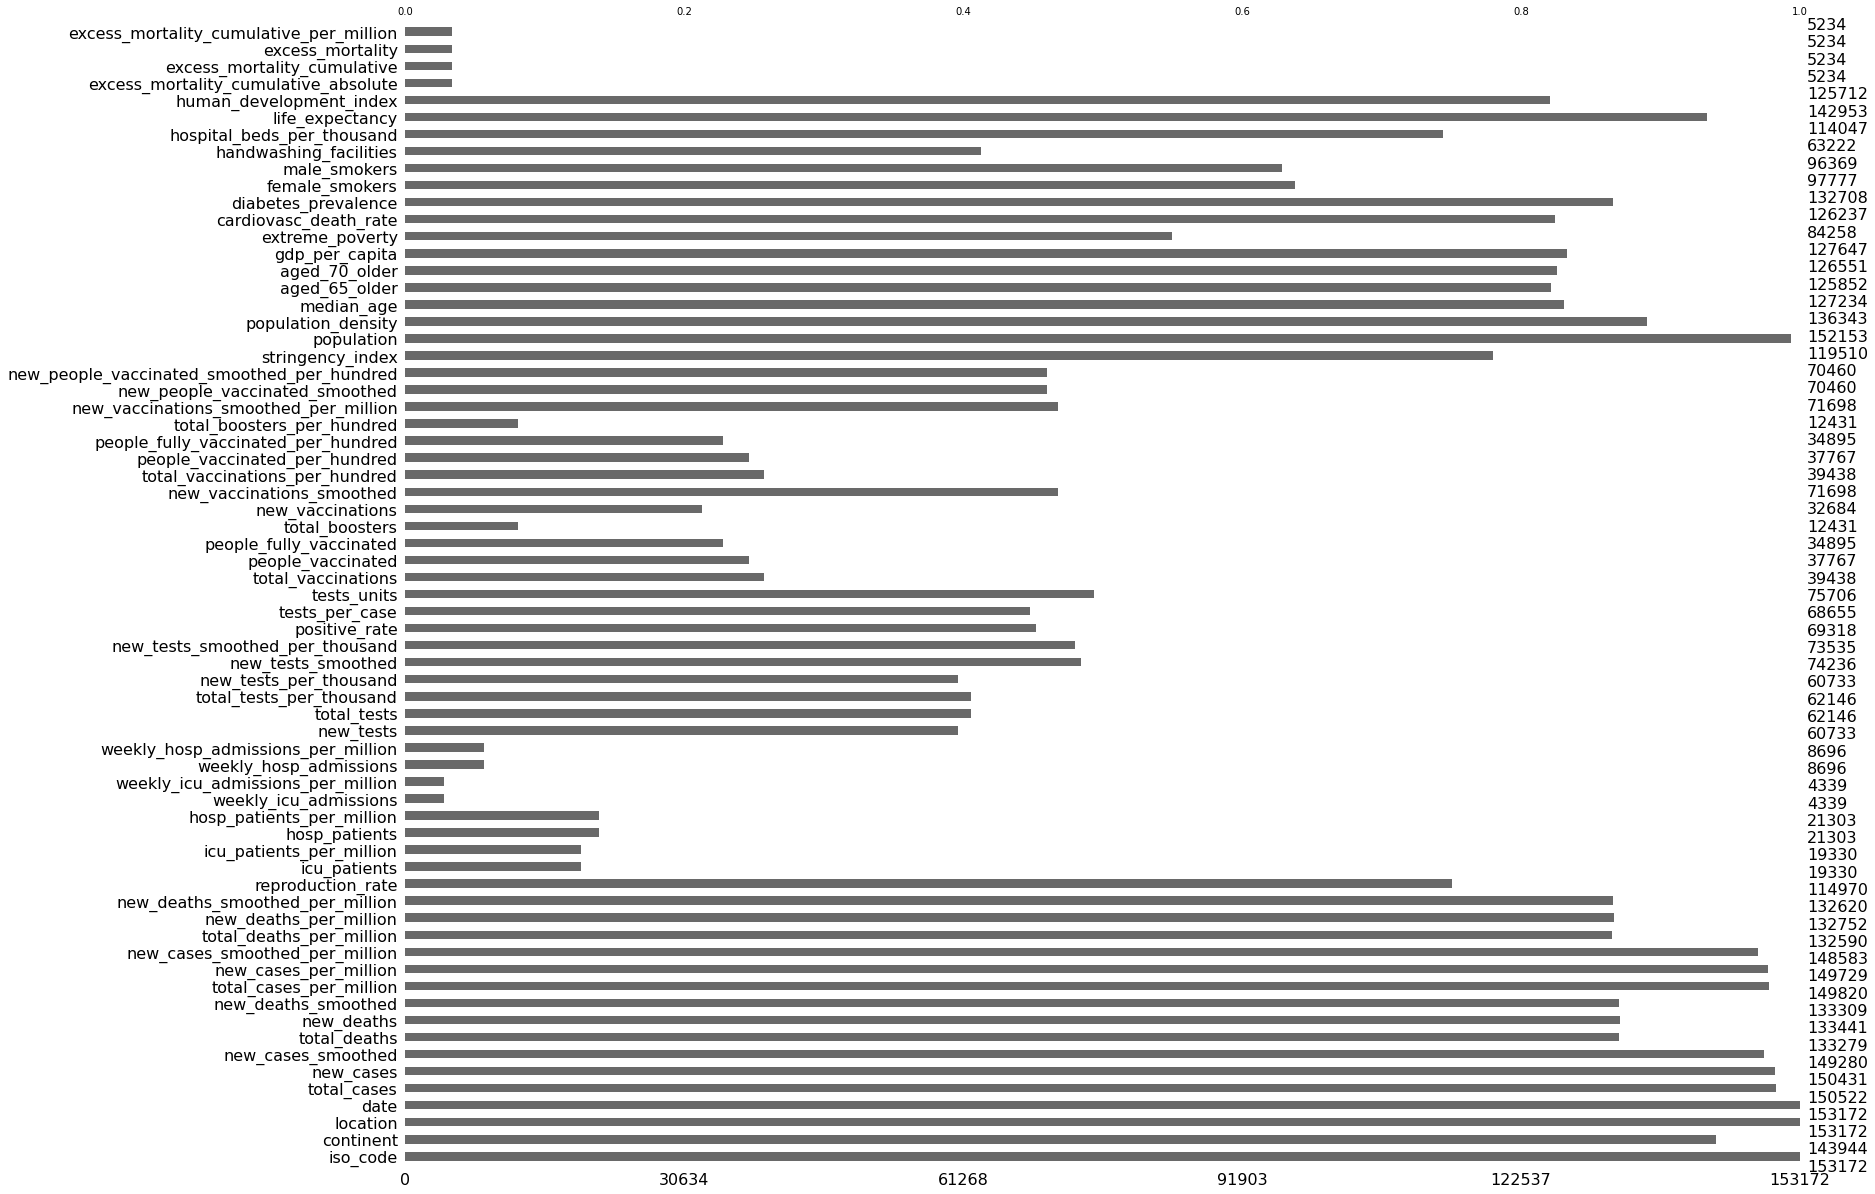

In [11]:
msnum.bar(covid_data)

### Summary Stats of Average Schooling Rate

In [12]:
schooling.dtypes

Entity                                                                                                       object
Code                                                                                                         object
Year                                                                                                          int64
Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))    float64
dtype: object

In [13]:
len(schooling)

7763

In [14]:
dates=schooling['Year']
date1=dates[0]
date2=dates[len(dates)-1]
print(date1,date2)

1870 2017


In [15]:
schooling.isnull().sum()

Entity                                                                                                      0
Code                                                                                                        0
Year                                                                                                        0
Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))    0
dtype: int64

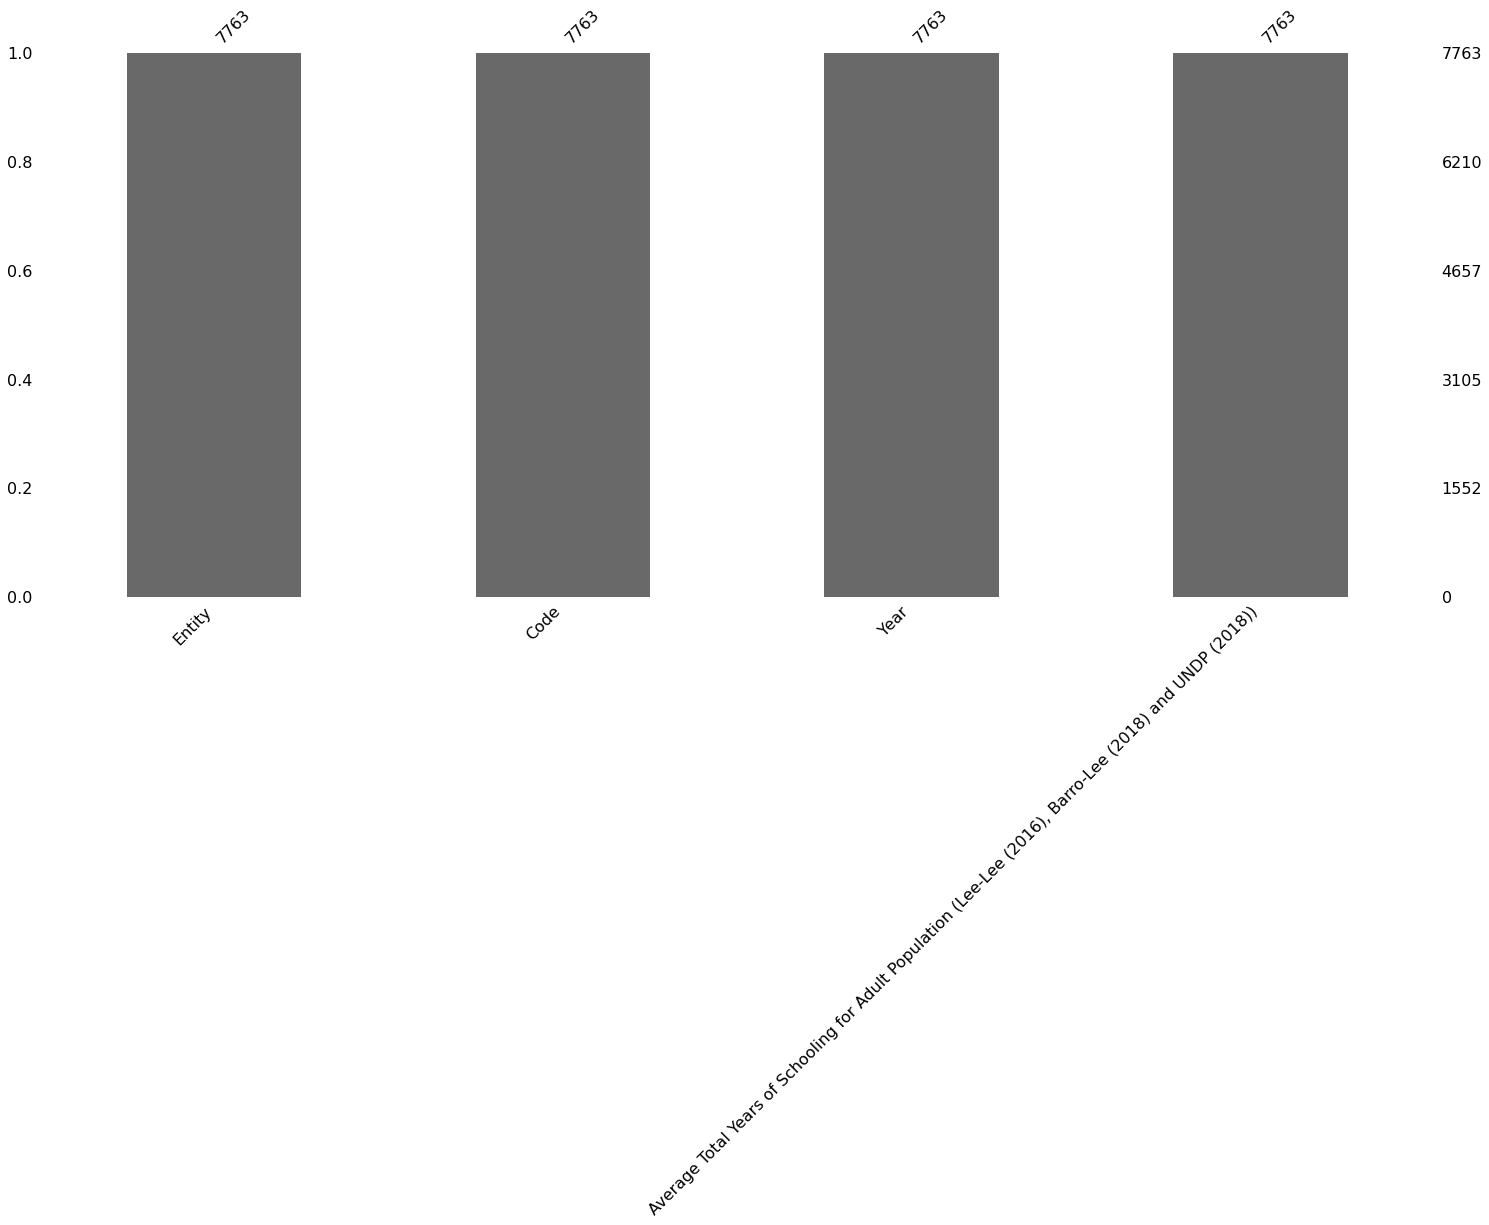

In [16]:
msnum.bar(schooling)

### Summary Stats of Education Spending Data

In [17]:
edu_spending.dtypes

Entity                                                    object
Code                                                      object
Year                                                       int64
Government expenditure on education, total (% of GDP)    float64
dtype: object

In [18]:
len(edu_spending)

4849

In [19]:
dates=edu_spending['Year']
date1=dates[0]
date2=dates[len(dates)-1]
print(date1,date2)

1971 2018


In [20]:
edu_spending.isnull().sum()

Entity                                                     0
Code                                                     944
Year                                                       0
Government expenditure on education, total (% of GDP)      0
dtype: int64

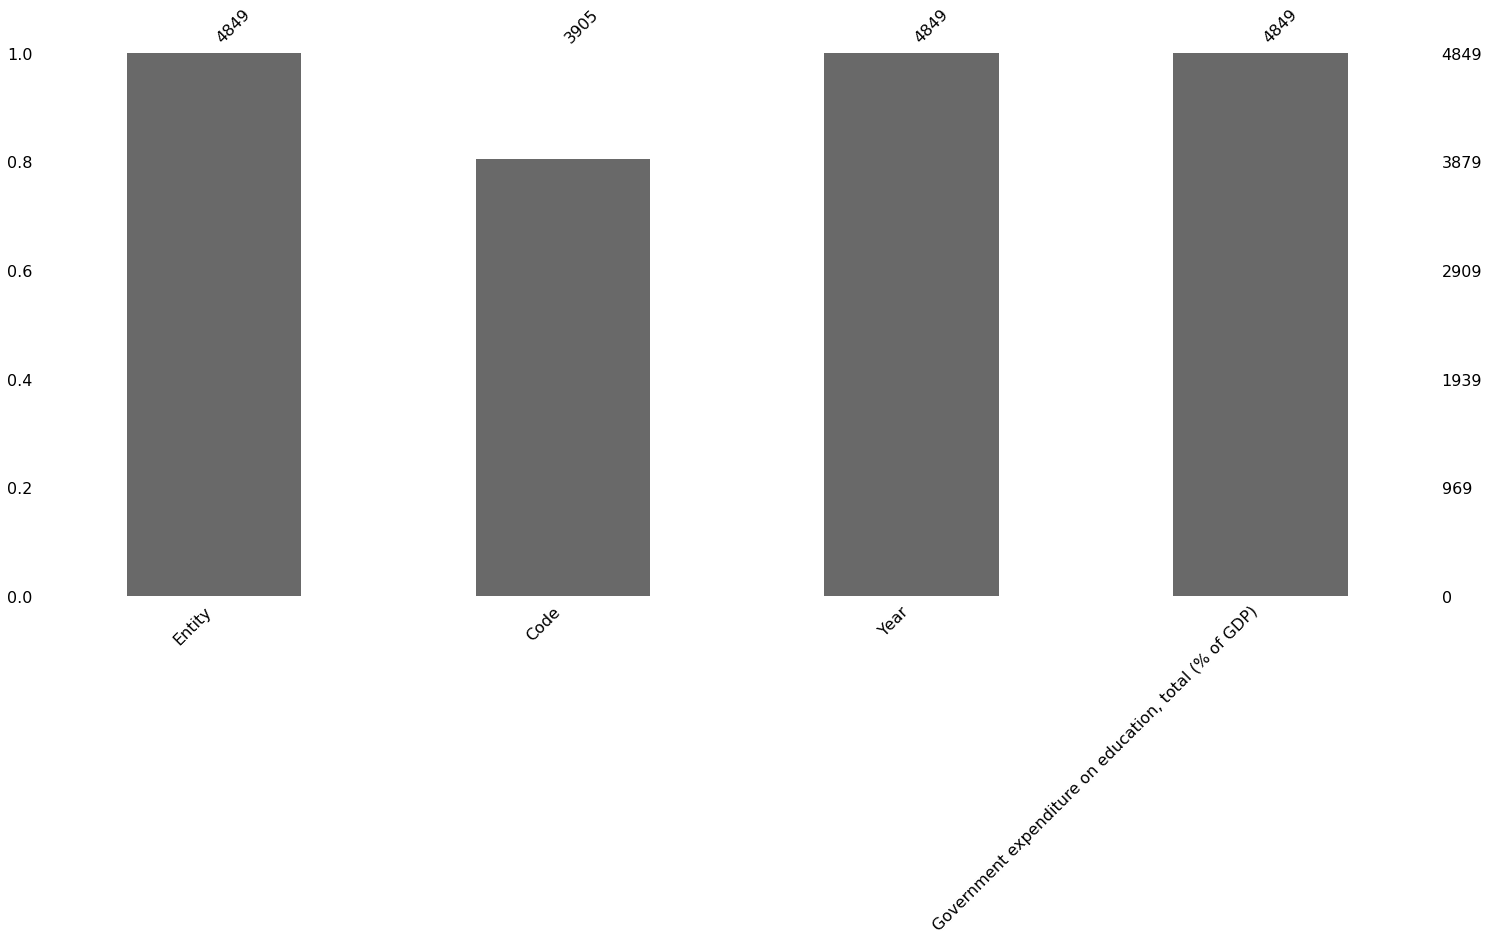

In [21]:
msnum.bar(edu_spending)

## Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

###Covid Dataset
For the Covid Dataset, most of the variables are numeric and self-explanatory, so they do not need any further explanation. Additionally, some are repeated, but reformated either in per thousand or per million. However, there are some that are not as clearly stated.<br/>
`date` is used as the index in this table and it has 153172 non-null entries. Any column that has a number of non-null entries less than 80% of the date entries will not be taken into consideration as they have too much missing data. Unless they seem like good indicators of our target variable.<br/>
Whenever a variable is smoothed, it means that it is 7-day smoothed, using a rolling average to help in visualizing patterns. You can see the difference between the charts for `new_cases` and `new_cases_smoothed` for Afghanistan below.<br/>
The only variable that is not straightforward is `tests_units`. It just states whether or not tests were performed. <br/>
Moreover, `stringency_index` might be a new term for some. Here is the definition from Our World in Data: _"The stringency index is a composite measure based on nine response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest)."_

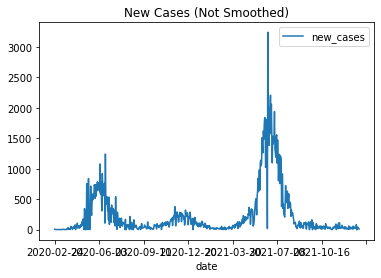

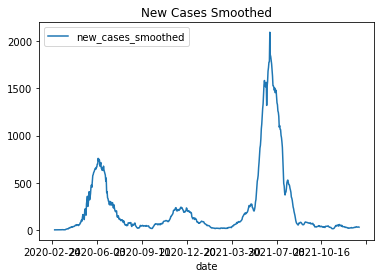

In [22]:
afg = covid_data[covid_data['iso_code'] == 'AFG']
afg.plot(x='date', y = 'new_cases', title = 'New Cases (Not Smoothed)')
afg.plot(x='date', y = 'new_cases_smoothed', title = 'New Cases Smoothed')

####Variable Description:
- iso_code
 - Three-letter code of the country
- continent
 - Geographical continent the country is located
- location
 - Geographical location
- date
 - Date of observation
- total_cases
 - Number of total cases observed
- new_cases
 - Number of new cases observed
- total_deaths
 - Number of total deaths observed
- new_deaths
 - Number of new deaths observed
- stringency_index
 - Composite measure based on nine response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest)
- population
 - Total population
- population_density
 - Concentration of the population
- median_age
 - Median of the age of individuals
- aged_65_older
 - Number of individuals aged over 65
- aged_70_older
 - Number of individuals aged over 70
- gdp_per_capita
 - GDP per capita
- cardiovasc_death_rate
 - Death rate from cardiovascular diseases
- diabetes_prevalence
 - % of population with diabetes
- hospital_beds_per_thousand
 - Number of hospital beds per thousand
- life_expectancy
 - Life expectancy of the citizens
- human_development_index
 - Human Development Index

In [23]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153172 entries, 0 to 153171
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    153172 non-null  object 
 1   continent                                   143944 non-null  object 
 2   location                                    153172 non-null  object 
 3   date                                        153172 non-null  object 
 4   total_cases                                 150522 non-null  float64
 5   new_cases                                   150431 non-null  float64
 6   new_cases_smoothed                          149280 non-null  float64
 7   total_deaths                                133279 non-null  float64
 8   new_deaths                                  133441 non-null  float64
 9   new_deaths_smoothed                         133309 non-null  float64
 

###Schooling Dataset
The Schooling Dataset only has 4 variables.<br/>
- *Entity:* 
  - Name of country
- *Code:*
  - Three-letter code of the country
- *Year:*
  - Year of observation
- *Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018)):* 
  - Represents the average total years of schooling for the adult population of the respective country in the respective year.

In [24]:
schooling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7763 entries, 0 to 7762
Data columns (total 4 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Entity                                                                                                    7763 non-null   object 
 1   Code                                                                                                      7763 non-null   object 
 2   Year                                                                                                      7763 non-null   int64  
 3   Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))  7763 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 242.7+ KB


###Government Expenditure on Education
Also only contains 4 variables.<br/>
- *Entity:* 
  - Name of country
- *Code:*
  - Three-letter code of the country
- *Year:*
  - Year of observation
- *Government expenditure on education, total (% of GDP):* 
  - Represents the total government expenditure of its GDP, in %, on education.

In [25]:
edu_spending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Entity                                                 4849 non-null   object 
 1   Code                                                   3905 non-null   object 
 2   Year                                                   4849 non-null   int64  
 3   Government expenditure on education, total (% of GDP)  4849 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 151.7+ KB


### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

In [26]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN



The below code gets the most current average schooling years for each country so we have the most recent value to merge onto our main dataset

In [27]:
schooling=schooling.dropna()

In [28]:
countries=schooling.Code.unique()
avg_year=[]
for country in countries:
  temp=schooling[schooling['Code']==country]
  avg_year.append(temp['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))'].iloc[-1])
schooling_revised=pd.DataFrame({'Country':countries,'Average Years of Schooling':avg_year})
schooling_revised=schooling_revised.set_index('Country')

In [29]:
edu_spending=edu_spending.dropna()

In [30]:
# edu_spending.head()
countries=edu_spending.Code.unique()
spending=[]
for country in countries:
  temp=edu_spending[edu_spending['Code']==country]
  spending.append(temp['Government expenditure on education, total (% of GDP)'].iloc[-1])
edu_spending_revised=pd.DataFrame({'Country':countries,'Education Spending as % of GDP':spending})
edu_spending_revised=edu_spending_revised.set_index('Country')

In [31]:
covid_data=covid_data.set_index('iso_code')

In [32]:
covid_data['Average_Years_Of_Schooling']=schooling_revised['Average Years of Schooling']
covid_data['Education Spending as % of GDP']=edu_spending_revised['Education Spending as % of GDP']
covid_data.head()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,Average_Years_Of_Schooling,Education Spending as % of GDP
iso_code,,,,,,,,,,,,,,,,,,,,,
AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,3.8,4.05887
AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,3.8,4.05887
AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,3.8,4.05887
AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,3.8,4.05887
AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,3.8,4.05887


### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

####Target Variable
- `total_cases`
  - We want to predict the number of total cases in each country.<br/>

####Predictor Variables
#####The next 3 variables contain a constant values and would be used as constant weights in the prediction. This constant will be different for each country.
- `Government expenditure on education, total (% of GDP)`
  - We believe that the % of GDP spent on education should be highly correlated with how well each country handled and contained the spread of Covid.

In [33]:
# GDP Spending
import plotly.express as px
new = covid_data[['total_cases', 'date', 'population', 'location', 'stringency_index', 'people_fully_vaccinated',
                  'new_cases_smoothed', 'human_development_index',
                  'Average_Years_Of_Schooling', 'Education Spending as % of GDP']]
new['cases%'] = new['total_cases'] / new['population']
avgGDP = covid_data.groupby('location').aggregate({'Education Spending as % of GDP':'mean'})
avgGDP = avgGDP.sort_values('Education Spending as % of GDP', ascending=False)
avgGDP = avgGDP.dropna()
top5 = avgGDP.head()
top5 = list(top5.index)
low5 = avgGDP.tail()
low5 = list(low5.index)

gdpTop = new[new['location'].isin(top5)]
gdpLow = new[new['location'].isin(low5)]

frames = [gdpTop, gdpLow]

gdp = pd.concat(frames)

fig = px.line(gdp, x = 'date', y = 'cases%', line_group = "location", color = 'location')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


- `Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))`
  - According to our hypothesis, this variable will be helpful in determining if countries with a higher percentage of educated people in their populations had better responses to Covid.

In [34]:
# Average Years of Schooling
import plotly.express as px
new = covid_data[['total_cases', 'date', 'population', 'location',
                  'Average_Years_Of_Schooling']]
new['cases%'] = new['total_cases'] / new['population']
avgYears = covid_data.groupby('location').aggregate({'Average_Years_Of_Schooling':'mean'})
avgYears = avgYears.sort_values('Average_Years_Of_Schooling', ascending=False)
avgYears = avgYears.dropna()
top5 = avgYears.head()
top5 = list(top5.index)
low5 = avgYears.tail()
low5 = list(low5.index)

schoolTop = new[new['location'].isin(top5)]
schoolLow = new[new['location'].isin(low5)]

frames = [schoolTop, schoolLow]

school = pd.concat(frames)


fig = px.line(school, x = 'date', y = 'cases%', line_group = "location", color = 'location')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



- `human_development_index`
  - Higher Human Development Index might correlate with higher spending on healthcare. It also might be correlated with higher education rates, as we think more educated people tend to take better care of themselves and practive healthier habits.

In [35]:
# Human Development Index
import plotly.express as px
new = covid_data[['total_cases', 'date', 'population', 'location', 'stringency_index', 'people_fully_vaccinated',
                  'new_cases_smoothed', 'human_development_index',
                  'Average_Years_Of_Schooling', 'Education Spending as % of GDP']]
new['cases%'] = new['total_cases'] / new['population']
avgHDI = covid_data.groupby('location').aggregate({'human_development_index':'mean'})
avgHDI = avgHDI.sort_values('human_development_index', ascending=False)
avgHDI = avgHDI.dropna()
top5 = avgHDI.head()
top5 = list(top5.index)
low5 = avgHDI.tail()
low5 = list(low5.index)

hdiTop = new[new['location'].isin(top5)]
hdiLow = new[new['location'].isin(low5)]

frames = [hdiTop, hdiLow]

hdi = pd.concat(frames)

fig = px.line(hdi, x = 'date', y = 'cases%', line_group = "location", color = 'location')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###Note on constant variables
The graphs above directly contradict our hypothesis that more educated countries would have had less total cases. The countries that have spent the most in education and have the highest average schooling years also have the highest number of cases.<br/>
Futhermore, the graphs show that the countries with a large amount of cases are also more developed countries, more clearly seen with the Human Development Index chart. We can form a new hypothesis that more developed countries' citizens move around (domestically and internationally) more, and consequently spread the disease more easily.

#####For the variables in the original dataset, it makes sense to pairplot them and check for any relationships with `total_cases`.

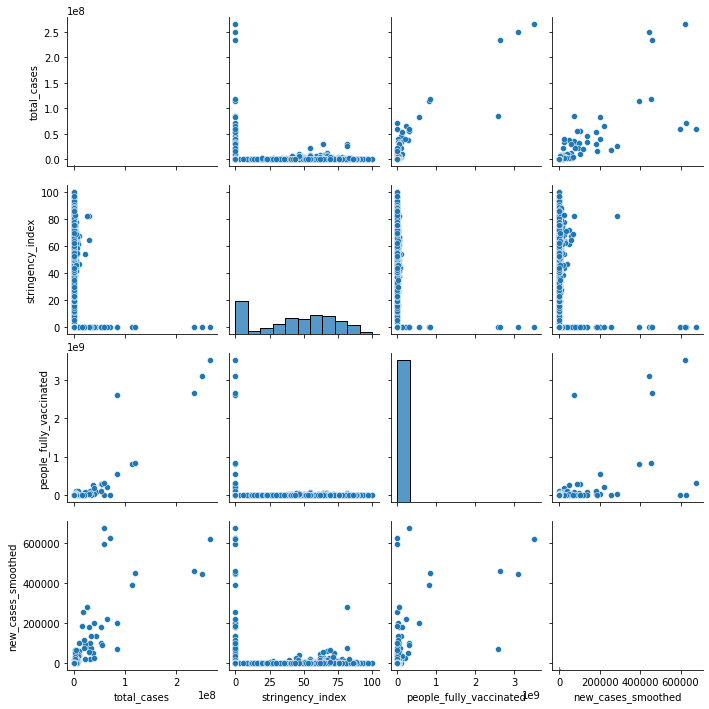

In [36]:
orgPredictors = covid_data[['total_cases', 'location', 'date', 'stringency_index', 'people_fully_vaccinated',
                  'new_cases_smoothed', 'human_development_index']]
orgPredictors = orgPredictors.groupby(['location', 'date']).aggregate({
                'total_cases':'sum', 'stringency_index':'sum',
                'people_fully_vaccinated':'sum', 'new_cases_smoothed':'sum'})
# Run only 1000 rows to significantly reduce runtime. Relationships are still
# visible
sns.pairplot(orgPredictors.sample(1000))

- `stringency_index`
  - The Stringency Index is a measure of how strict the responses of each country were. This will be helpful in testing our hypothesis that more educated countries pushed for higher restrictions to prevent the spread of covid.

- `people_fully_vaccinated`
  - Higher amounts of fully vaccinated people might be correlated with higher education rates as less educated people often advocate agains vaccines.
  - The relationship appears to have the form of a square root plot.

- `new_cases_smoothed`
  - The number of new cases (especially smoothed) will be helpful in determining patterns of rising/decreasing rates of infection.
  - The relationship looks quadratic.